In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from io import BytesIO
from zipfile import ZipFile
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import os
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
zip_file_path = '2MELACHROINOS.zip'
csv_file_inside_zip = '2MELACHROINOS.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [6]:
df.head(5)

,HOUSEID,PERSONID,VEHID,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,...,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,20000017,1,2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,...,April,Wednesday,22.00,25,Medical/Dental,1,suv,748.0,4548.07,1
1,20000017,1,2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,...,April,Wednesday,0.22,2,Visit Friends/Relatives,1,suv,748.0,4548.07,1
2,20000017,1,2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,...,April,Wednesday,22.00,30,Visit Friends/Relatives,1,suv,748.0,4548.07,1
3,20000017,1,2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,...,April,Wednesday,20.00,35,School/Church,1,suv,748.0,4548.07,1
4,20000017,2,2,200.8,yes,College or Associate's degree,3,3,"2+ adults, retired, no children",58,...,April,Wednesday,22.00,25,Visit Friends/Relatives,1,suv,748.0,4548.07,1


In [7]:
drop_col = ["HOUSEID", "PERSONID", "VEHID"]
df = df.drop(drop_col, axis=1)
df

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,25,Medical/Dental,1,suv,748.000000,4548.07,1
1,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,0.22,2,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,30,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
3,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,20.00,35,School/Church,1,suv,748.000000,4548.07,1
4,200.8,yes,College or Associate's degree,3,3,"2+ adults, retired, no children",58,female,April,Wednesday,22.00,25,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567110,246.9,yes,Bachelor's degree,7,5,"2+ adults, youngest child 6-15",59,male,January,Monday,4.78,12,To/From Work,1,pickup truck,896.906177,7756.19,26
567111,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,9.12,26,Other Family/Personal Business,1,van,1141.752451,8886.19,21
567112,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,7,Shopping,1,van,1141.752451,8886.19,21
567113,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,8,Other Family/Personal Business,1,van,1141.752451,8886.19,21


In [8]:
df.isnull().any()

GASPRICE    False
DRVR_FLG    False
EDUC        False
HHSIZE      False
HHVEHCNT    False
LIF_CYC     False
R_AGE       False
R_SEX       False
Month       False
TRAVDAY     False
TRPMILES    False
TRVLCMIN    False
WHYTRP90    False
WRKCOUNT    False
TRPTRANS    False
GSTOTCST    False
BESTMILE    False
VEHAGE      False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567115 entries, 0 to 567114
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GASPRICE  567115 non-null  float64
 1   DRVR_FLG  567115 non-null  object 
 2   EDUC      567115 non-null  object 
 3   HHSIZE    567115 non-null  int64  
 4   HHVEHCNT  567115 non-null  int64  
 5   LIF_CYC   567115 non-null  object 
 6   R_AGE     567115 non-null  int64  
 7   R_SEX     567115 non-null  object 
 8   Month     567115 non-null  object 
 9   TRAVDAY   567115 non-null  object 
 10  TRPMILES  567115 non-null  float64
 11  TRVLCMIN  567115 non-null  int64  
 12  WHYTRP90  567115 non-null  object 
 13  WRKCOUNT  567115 non-null  int64  
 14  TRPTRANS  567115 non-null  object 
 15  GSTOTCST  567115 non-null  float64
 16  BESTMILE  567115 non-null  float64
 17  VEHAGE    567115 non-null  int64  
dtypes: float64(4), int64(6), object(8)
memory usage: 77.9+ MB


In [10]:
df.duplicated().sum()

14

In [11]:
df.drop_duplicates(keep='first',inplace=True)
df

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,25,Medical/Dental,1,suv,748.000000,4548.07,1
1,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,0.22,2,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,30,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
3,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,20.00,35,School/Church,1,suv,748.000000,4548.07,1
4,200.8,yes,College or Associate's degree,3,3,"2+ adults, retired, no children",58,female,April,Wednesday,22.00,25,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567110,246.9,yes,Bachelor's degree,7,5,"2+ adults, youngest child 6-15",59,male,January,Monday,4.78,12,To/From Work,1,pickup truck,896.906177,7756.19,26
567111,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,9.12,26,Other Family/Personal Business,1,van,1141.752451,8886.19,21
567112,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,7,Shopping,1,van,1141.752451,8886.19,21
567113,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,8,Other Family/Personal Business,1,van,1141.752451,8886.19,21


In [12]:
df.head(5)

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,25,Medical/Dental,1,suv,748.0,4548.07,1
1,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,0.22,2,Visit Friends/Relatives,1,suv,748.0,4548.07,1
2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,30,Visit Friends/Relatives,1,suv,748.0,4548.07,1
3,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,20.00,35,School/Church,1,suv,748.0,4548.07,1
4,200.8,yes,College or Associate's degree,3,3,"2+ adults, retired, no children",58,female,April,Wednesday,22.00,25,Visit Friends/Relatives,1,suv,748.0,4548.07,1


In [13]:
df.describe()

,GASPRICE,HHSIZE,HHVEHCNT,R_AGE,TRPMILES,TRVLCMIN,WRKCOUNT,GSTOTCST,BESTMILE,VEHAGE
count,567101.000000,567101.000000,567101.00000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000
mean,259.195452,2.761582,2.41651,53.216886,7.457550,16.750466,1.275205,1806.105830,12351.373523,7.577178
std,70.128272,1.335875,1.06801,15.025643,8.774422,13.170753,0.936375,1190.497390,7874.464606,5.400439
min,149.500000,1.000000,1.00000,18.000000,0.010000,1.000000,0.000000,0.093203,0.480000,1.000000
25%,212.000000,2.000000,2.00000,42.000000,2.000000,8.000000,1.000000,969.126987,6794.750000,3.000000
50%,235.600000,2.000000,2.00000,54.000000,4.150000,15.000000,1.000000,1569.000000,11041.020000,6.000000
75%,281.900000,4.000000,3.00000,65.000000,9.730000,20.000000,2.000000,2367.964351,16247.770000,11.000000
max,446.000000,14.000000,7.00000,92.000000,60.000000,80.000000,7.000000,7988.000000,60000.000000,35.000000


In [11]:
df

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,25,Medical/Dental,1,suv,748.000000,4548.07,1
1,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,0.22,2,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
2,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,22.00,30,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
3,200.8,no,College or Associate's degree,3,3,"2+ adults, retired, no children",75,male,April,Wednesday,20.00,35,School/Church,1,suv,748.000000,4548.07,1
4,200.8,yes,College or Associate's degree,3,3,"2+ adults, retired, no children",58,female,April,Wednesday,22.00,25,Visit Friends/Relatives,1,suv,748.000000,4548.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567110,246.9,yes,Bachelor's degree,7,5,"2+ adults, youngest child 6-15",59,male,January,Monday,4.78,12,To/From Work,1,pickup truck,896.906177,7756.19,26
567111,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,9.12,26,Other Family/Personal Business,1,van,1141.752451,8886.19,21
567112,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,7,Shopping,1,van,1141.752451,8886.19,21
567113,246.9,yes,College or Associate's degree,7,5,"2+ adults, youngest child 6-15",22,female,January,Monday,0.78,8,Other Family/Personal Business,1,van,1141.752451,8886.19,21


# EDA

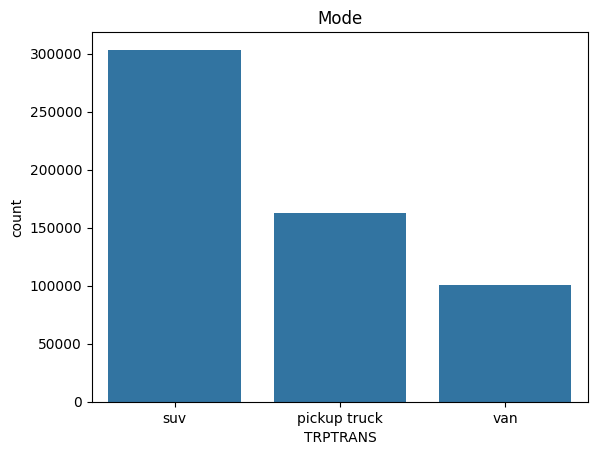

In [14]:
bar_mode=sns.countplot(x='TRPTRANS', data=df)
plt.title('Mode')
plt.show(bar_mode)

In [15]:
percentage_mode = (df['TRPTRANS'].value_counts(normalize=True) * 100).reset_index()
print(percentage_mode)

       TRPTRANS  proportion
0           suv   53.504226
1  pickup truck   28.746908
2           van   17.748867


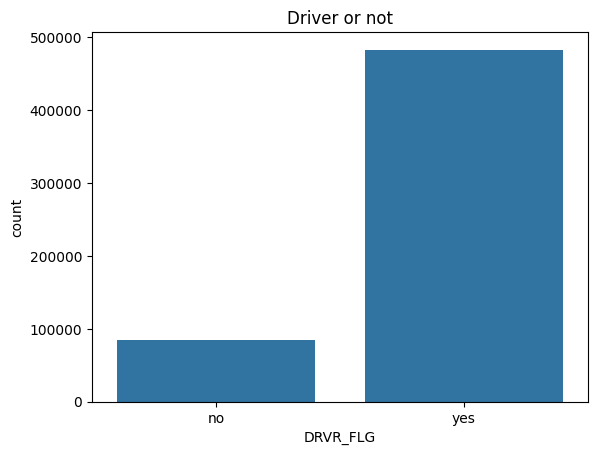

In [16]:
bar_flag=sns.countplot(x='DRVR_FLG', data=df)
plt.title('Driver or not')
plt.show(bar_flag)

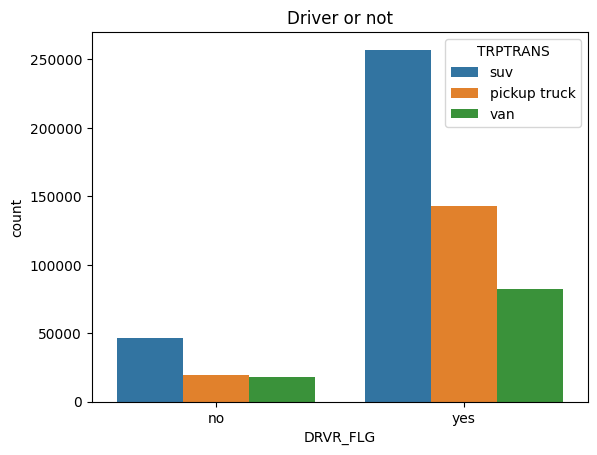

In [17]:
bar_flag=sns.countplot(x='DRVR_FLG', data=df, hue="TRPTRANS")
plt.title('Driver or not')
plt.show(bar_flag)

In [18]:
percentage_flag = (df['DRVR_FLG'].value_counts(normalize=True) * 100).reset_index()
print(percentage_flag)

  DRVR_FLG  proportion
0      yes   85.179712
1       no   14.820288


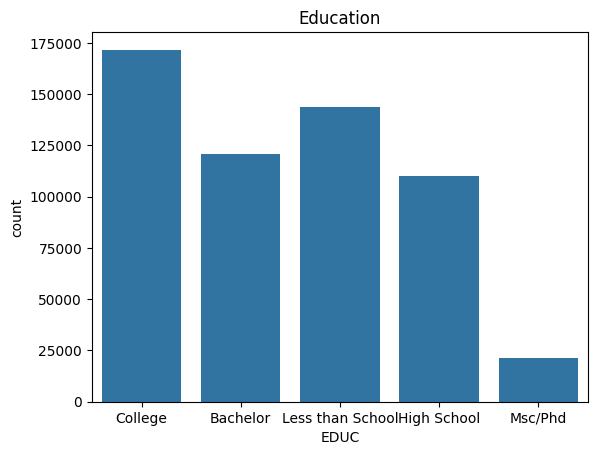

In [19]:
bar_educ=sns.countplot(x='EDUC', data=df)
plt.title('Education')
plt.xticks(ticks=bar_educ.get_xticks(), labels=['College', 'Bachelor', 'Less than School', 'High School', 'Msc/Phd'])
plt.show(bar_educ)

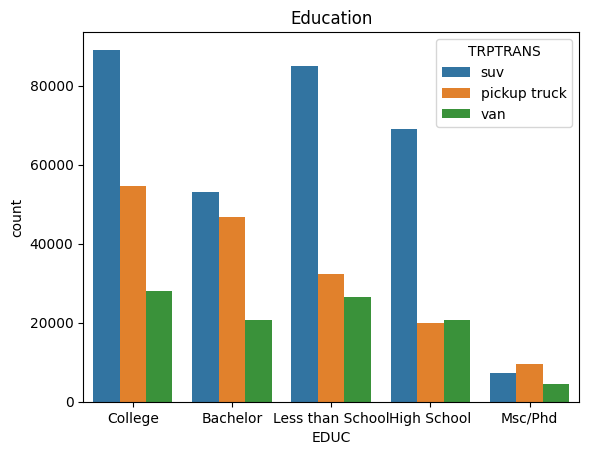

In [20]:
bar_educ=sns.countplot(x='EDUC', data=df, hue="TRPTRANS")
plt.title('Education')
plt.xticks(ticks=bar_educ.get_xticks(), labels=['College', 'Bachelor', 'Less than School', 'High School', 'Msc/Phd'])
plt.show(bar_educ)

In [21]:
percentage_edu = (df['EDUC'].value_counts(normalize=True) * 100).reset_index()
print(percentage_edu)

                                         EDUC  proportion
0               College or Associate's degree   30.265685
1                           Bachelor's degree   25.349805
2                        High school graduate   21.258823
3  Graduate or Professional Degree (Msc, Phd)   19.374679
4              Less then high school graduate    3.751007


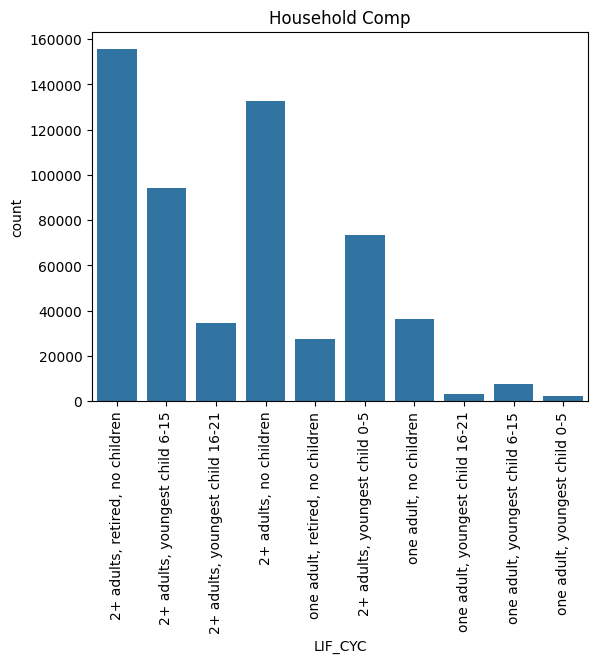

In [22]:
bar_cyc=sns.countplot(x='LIF_CYC', data=df)
plt.title('Household Comp')
plt.xticks(rotation=90)
plt.show(bar_cyc)

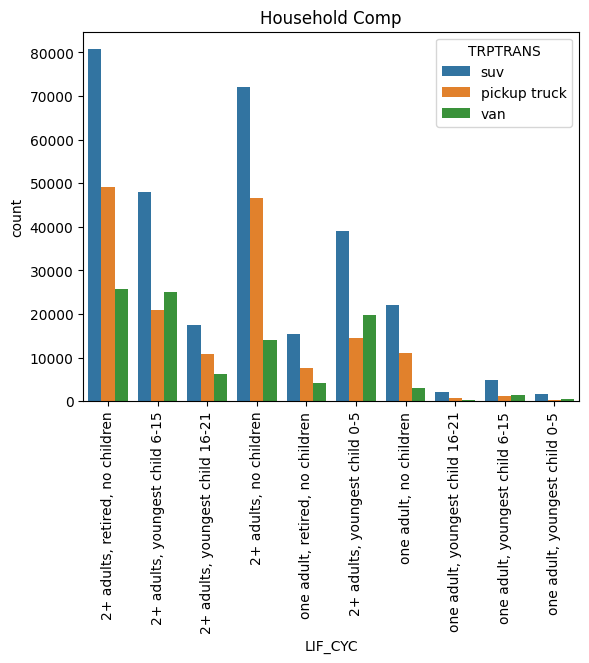

In [25]:
bar_cyc=sns.countplot(x='LIF_CYC', data=df, hue="TRPTRANS")
plt.title('Household Comp')
plt.xticks(rotation=90)
plt.show(bar_cyc)

In [23]:
percentage_cyc = (df['LIF_CYC'].value_counts(normalize=True) * 100).reset_index()
print(percentage_cyc)

                           LIF_CYC  proportion
0  2+ adults, retired, no children   27.423334
1           2+ adults, no children   23.410468
2   2+ adults, youngest child 6-15   16.584876
3    2+ adults, youngest child 0-5   12.946018
4           one adult, no children    6.403269
5  2+ adults, youngest child 16-21    6.089391
6  one adult, retired, no children    4.822598
7   one adult, youngest child 6-15    1.323926
8  one adult, youngest child 16-21    0.569916
9    one adult, youngest child 0-5    0.426203


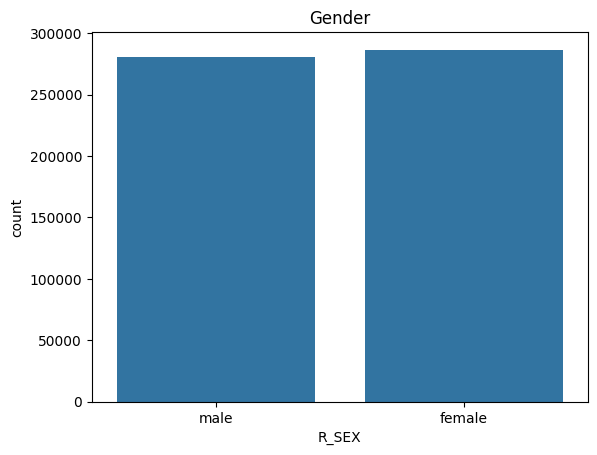

In [24]:
bar_sex=sns.countplot(x='R_SEX', data=df)
plt.title('Gender')
plt.show(bar_sex)

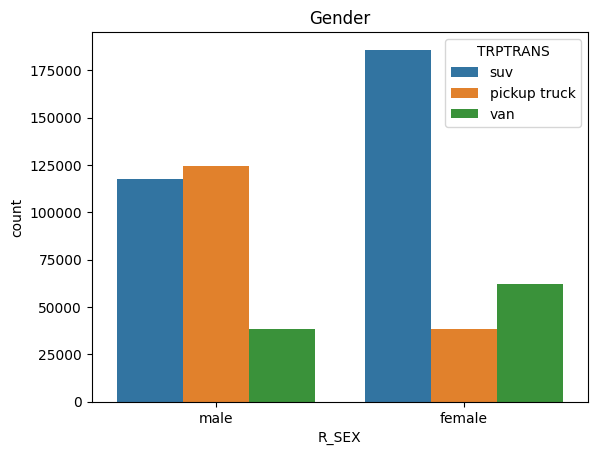

In [25]:
bar_sex=sns.countplot(x='R_SEX', data=df, hue="TRPTRANS")
plt.title('Gender')
plt.show(bar_sex)

In [26]:
percentage_sex = (df['R_SEX'].value_counts(normalize=True) * 100).reset_index()
print(percentage_sex)

    R_SEX  proportion
0  female   50.532445
1    male   49.467555


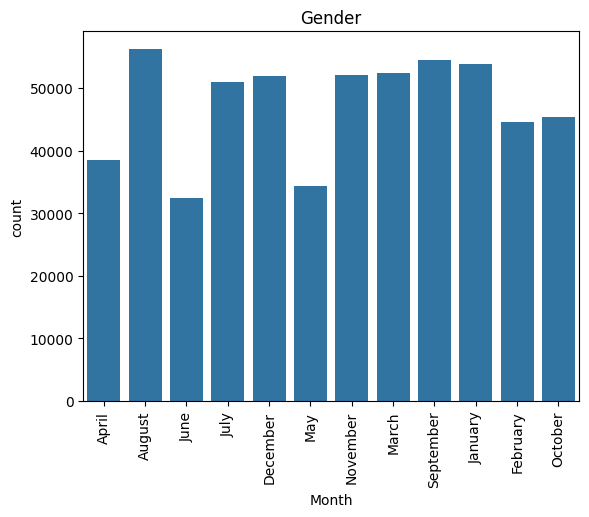

In [27]:
bar_month=sns.countplot(x='Month', data=df)
plt.title('Gender')
plt.xticks(rotation=90)
plt.show(bar_month)

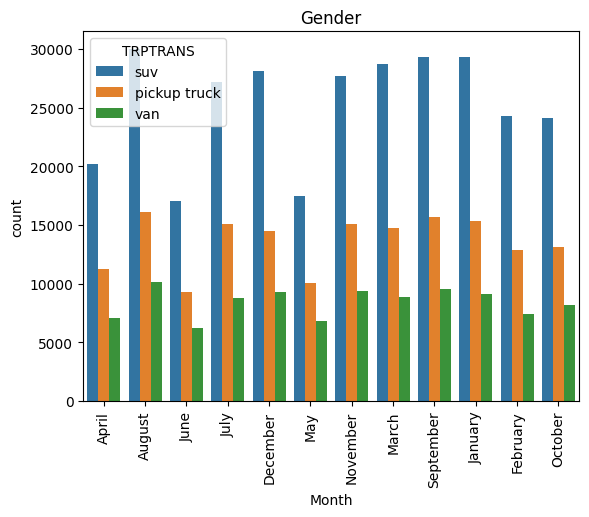

In [28]:
bar_month=sns.countplot(x='Month', data=df, hue="TRPTRANS")
plt.title('Gender')
plt.xticks(rotation=90)
plt.show(bar_month)

In [29]:
percentage_month = (df['Month'].value_counts(normalize=True) * 100).reset_index()
print(percentage_month)

        Month  proportion
0      August    9.914636
1   September    9.617511
2     January    9.477677
3       March    9.234334
4    November    9.193953
5    December    9.146872
6        July    8.988346
7     October    7.997165
8    February    7.863502
9       April    6.784858
10        May    6.052714
11       June    5.728433


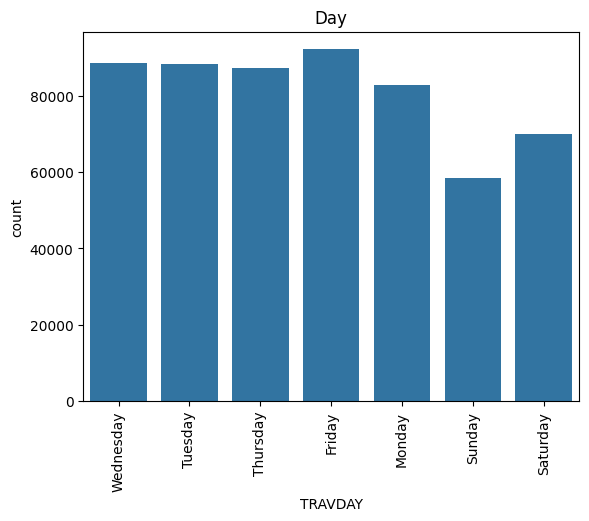

In [30]:
bar_day=sns.countplot(x='TRAVDAY', data=df)
plt.title('Day')
plt.xticks(rotation=90)
plt.show(bar_day)

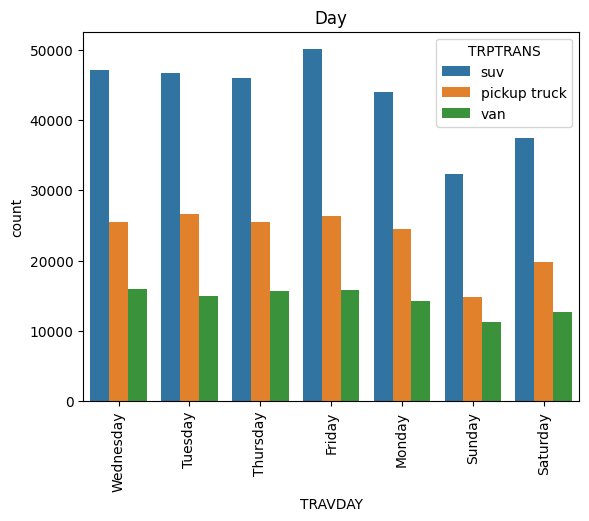

In [36]:
bar_day=sns.countplot(x='TRAVDAY', data=df, hue="TRPTRANS")
plt.title('Day')
plt.xticks(rotation=90)
plt.show(bar_day)

In [37]:
percentage_day = (df['TRAVDAY'].value_counts(normalize=True) * 100).reset_index()
print(percentage_day)

       index    TRAVDAY
0     Friday  16.248781
1  Wednesday  15.623143
2    Tuesday  15.553490
3   Thursday  15.373805
4     Monday  14.588583
5   Saturday  12.312269
6     Sunday  10.299929


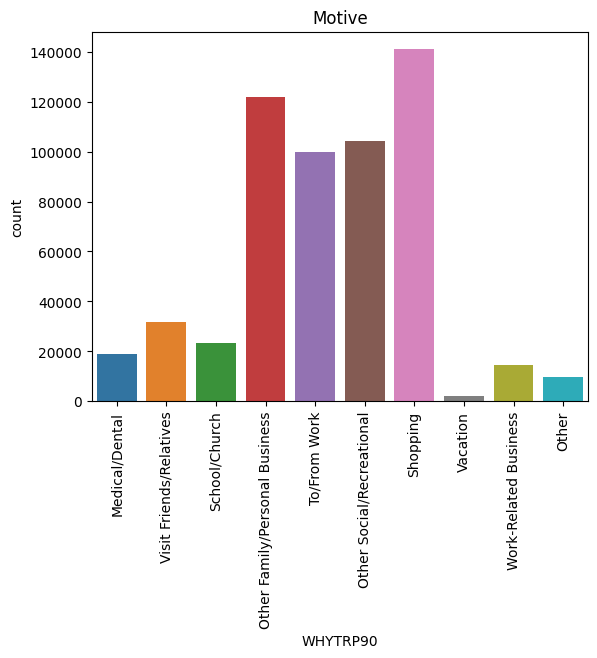

In [38]:
bar_mot=sns.countplot(x='WHYTRP90', data=df)
plt.title('Motive')
plt.xticks(rotation=90)
plt.show(bar_mot)

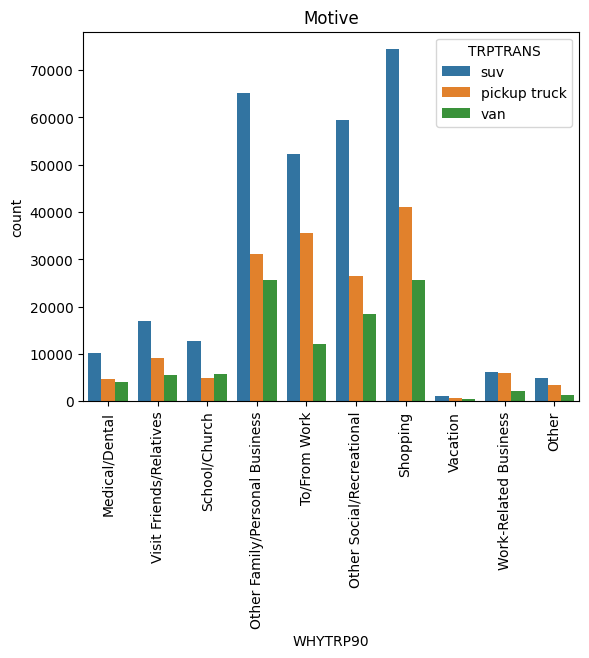

In [39]:
bar_mot=sns.countplot(x='WHYTRP90', data=df, hue="TRPTRANS")
plt.title('Motive')
plt.xticks(rotation=90)
plt.show(bar_mot)

In [40]:
percentage_mot = (df['WHYTRP90'].value_counts(normalize=True) * 100).reset_index()
print(percentage_mot)

                            index   WHYTRP90
0                        Shopping  24.873523
1  Other Family/Personal Business  21.465312
2       Other Social/Recreational  18.397957
3                    To/From Work  17.613970
4         Visit Friends/Relatives   5.578019
5                   School/Church   4.137006
6                  Medical/Dental   3.330976
7           Work-Related Business   2.533411
8                           Other   1.680300
9                        Vacation   0.389525


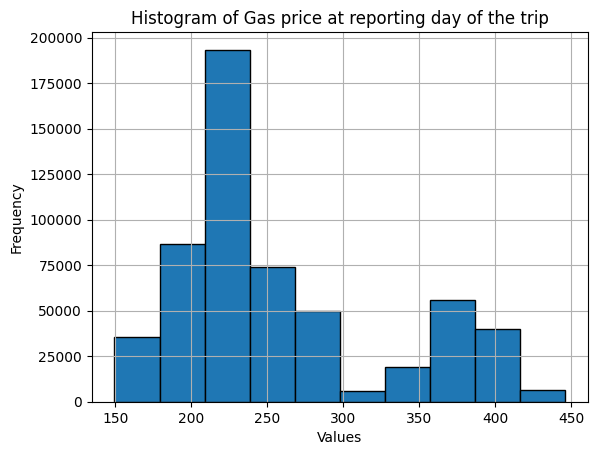

In [41]:
df['GASPRICE'].hist(bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Gas price at reporting day of the trip')
plt.show()

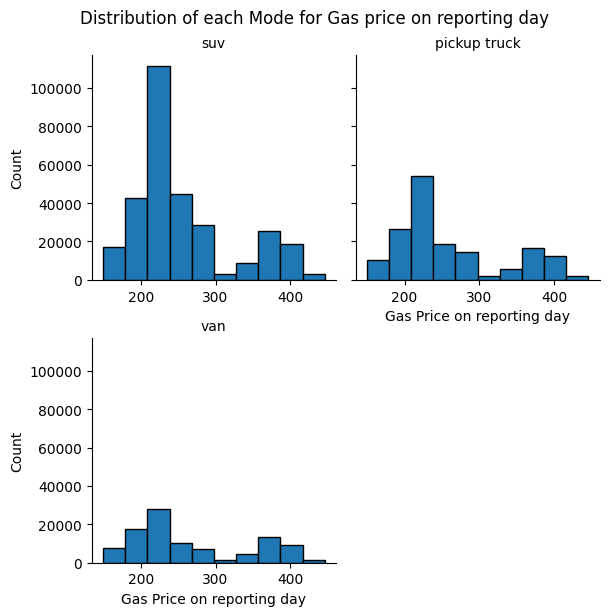

In [42]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'GASPRICE', bins=10, edgecolor='black')
g.set_axis_labels('Gas Price on reporting day', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Gas price on reporting day', y=1.02)
plt.show()

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [44]:
df["GASPRICE"].describe()

count   567101.000
mean       259.195
std         70.128
min        149.500
25%        212.000
50%        235.600
75%        281.900
max        446.000
Name: GASPRICE, dtype: float64

In [46]:
df["HHSIZE"].describe()

count   567101.000
mean         2.762
std          1.336
min          1.000
25%          2.000
50%          2.000
75%          4.000
max         14.000
Name: HHSIZE, dtype: float64

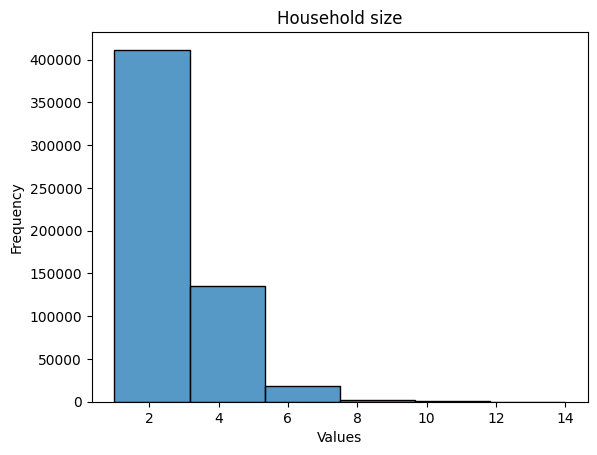

In [47]:
sns.histplot(df['HHSIZE'], bins=6, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Household size')
plt.show()

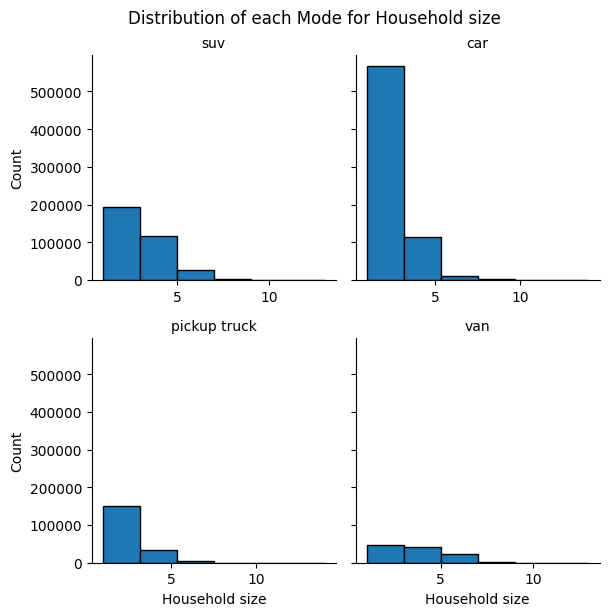

In [144]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'HHSIZE', bins=6, edgecolor='black')
g.set_axis_labels('Household size', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Household size', y=1.02)
plt.show()

In [48]:
df["HHVEHCNT"].describe()

count   567101.000
mean         2.417
std          1.068
min          1.000
25%          2.000
50%          2.000
75%          3.000
max          7.000
Name: HHVEHCNT, dtype: float64

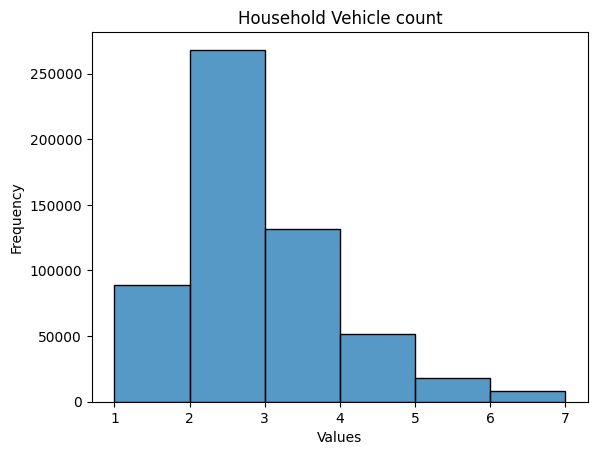

In [49]:
sns.histplot(df['HHVEHCNT'], bins=6, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Household Vehicle count')
plt.show()

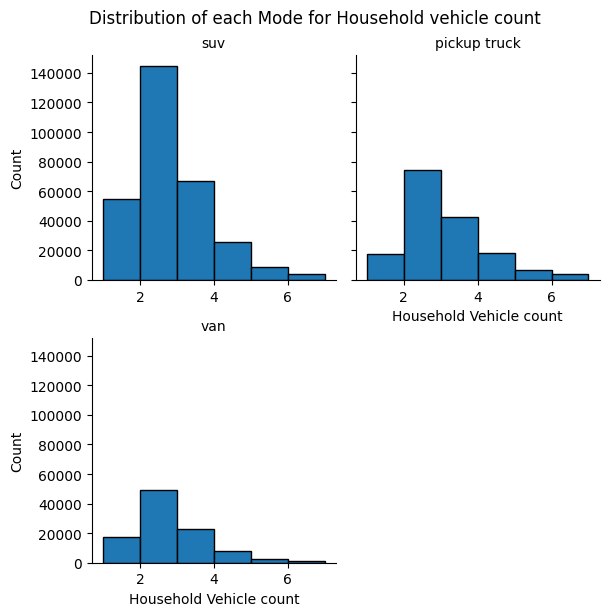

In [50]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'HHVEHCNT', bins=6, edgecolor='black')
g.set_axis_labels('Household Vehicle count', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Household vehicle count', y=1.02)
plt.show()

In [52]:
df["R_AGE"].describe()

count   567101.000
mean        53.217
std         15.026
min         18.000
25%         42.000
50%         54.000
75%         65.000
max         92.000
Name: R_AGE, dtype: float64

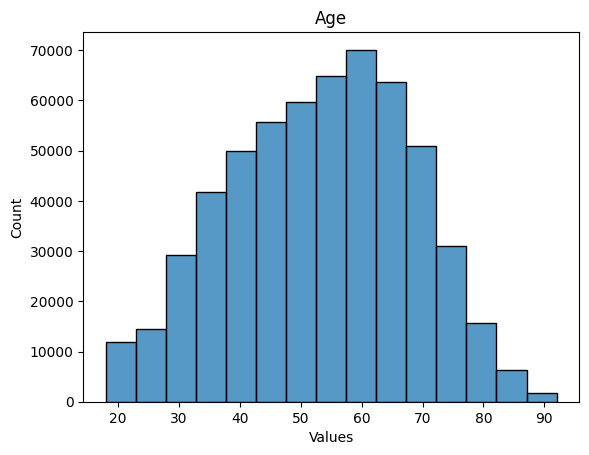

In [53]:
sns.histplot(df['R_AGE'], bins=15, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Age')
plt.show()

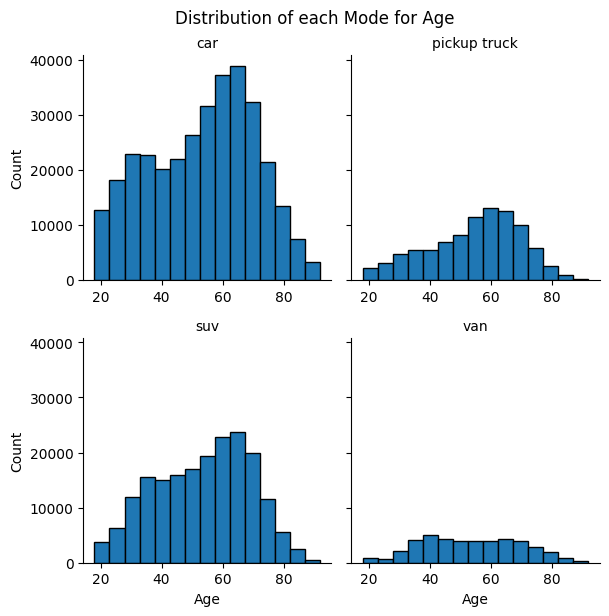

In [161]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'R_AGE', bins=15, edgecolor='black')
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Age', y=1.02)
plt.show()

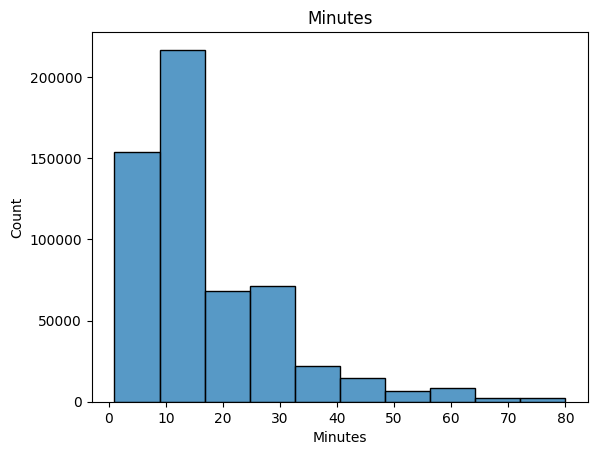

In [54]:
sns.histplot(df['TRVLCMIN'], bins=10, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Minutes')
plt.show()

In [57]:
df["TRVLCMIN"].describe()

count   567101.000
mean        16.750
std         13.171
min          1.000
25%          8.000
50%         15.000
75%         20.000
max         80.000
Name: TRVLCMIN, dtype: float64

In [58]:
df["TRPMILES"].describe()

count   567101.000
mean         7.458
std          8.774
min          0.010
25%          2.000
50%          4.150
75%          9.730
max         60.000
Name: TRPMILES, dtype: float64

In [59]:
df.shape

(567101, 19)

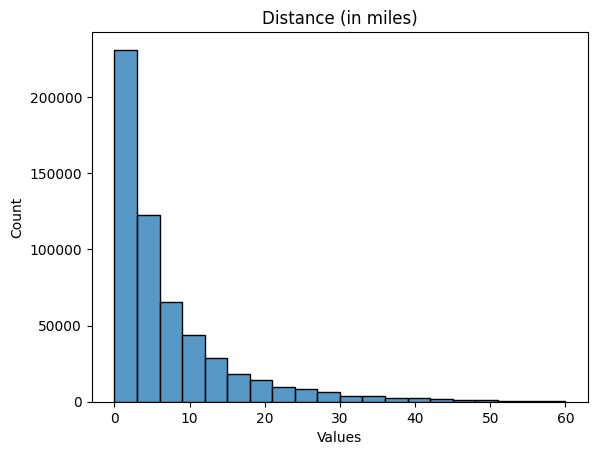

In [60]:
sns.histplot(df['TRPMILES'], bins=20, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Distance (in miles)')
plt.show()

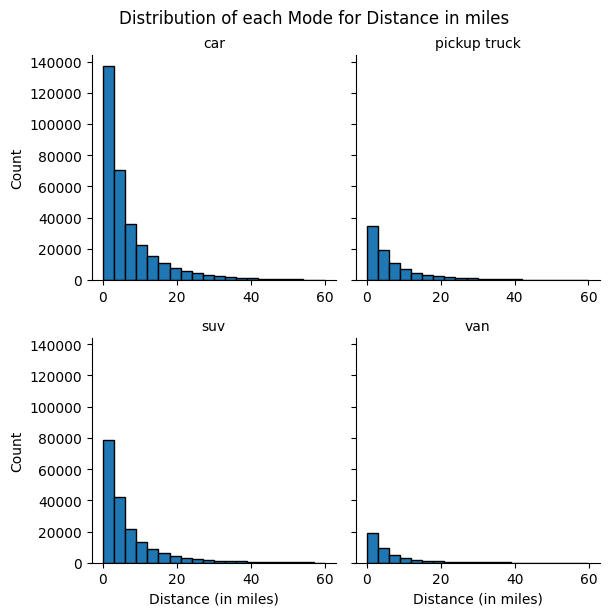

In [292]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'TRPMILES', bins=20, edgecolor='black')
g.set_axis_labels('Distance (in miles)', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Distance in miles', y=1.02)
plt.show()

In [344]:
df.shape

(638108, 25)

In [61]:
df["GSTOTCST"].describe()

count   567101.000
mean      1806.106
std       1190.497
min          0.093
25%        969.127
50%       1569.000
75%       2367.964
max       7988.000
Name: GSTOTCST, dtype: float64

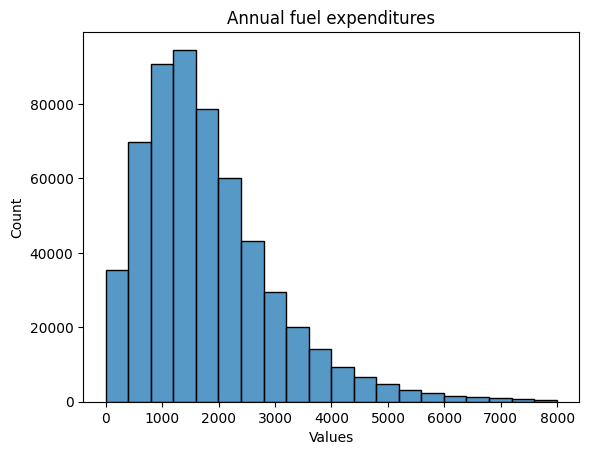

In [62]:
sns.histplot(df['GSTOTCST'], bins=20, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Annual fuel expenditures')
plt.show()

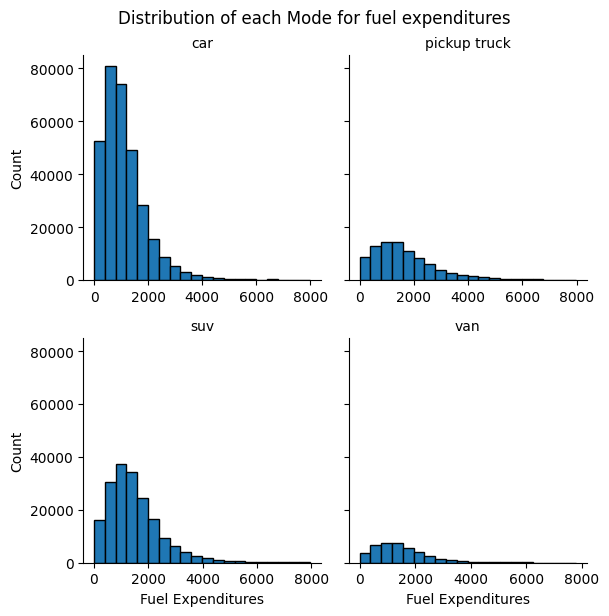

In [307]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'GSTOTCST', bins=20, edgecolor='black')
g.set_axis_labels('Fuel Expenditures', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for fuel expenditures', y=1.02)
plt.show()

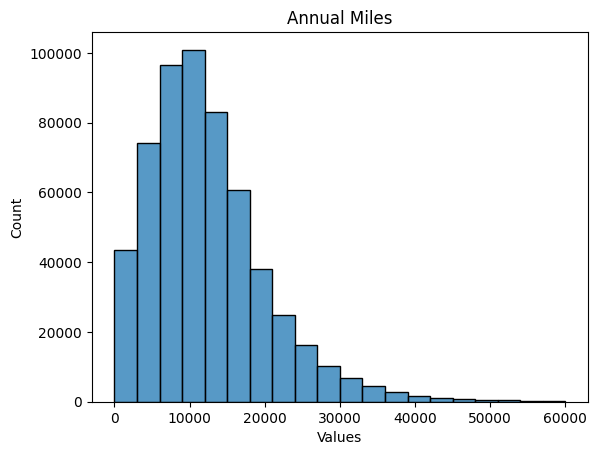

In [31]:
sns.histplot(df['BESTMILE'], bins=20, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Annual Miles')
plt.show()

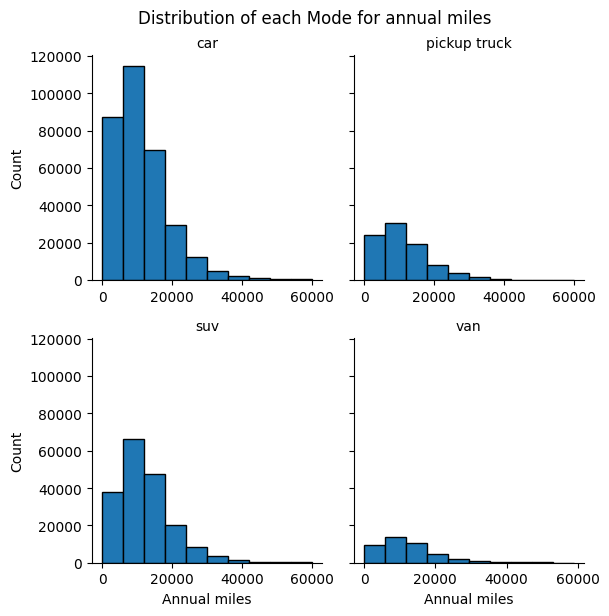

In [320]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'BESTMILE', bins=10, edgecolor='black')
g.set_axis_labels('Annual miles', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for annual miles', y=1.02)
plt.show()

In [64]:
df["BESTMILE"].describe()

count   567101.000
mean     12351.374
std       7874.465
min          0.480
25%       6794.750
50%      11041.020
75%      16247.770
max      60000.000
Name: BESTMILE, dtype: float64

In [65]:
df["VEHAGE"].describe()

count   567101.000
mean         7.577
std          5.400
min          1.000
25%          3.000
50%          6.000
75%         11.000
max         35.000
Name: VEHAGE, dtype: float64

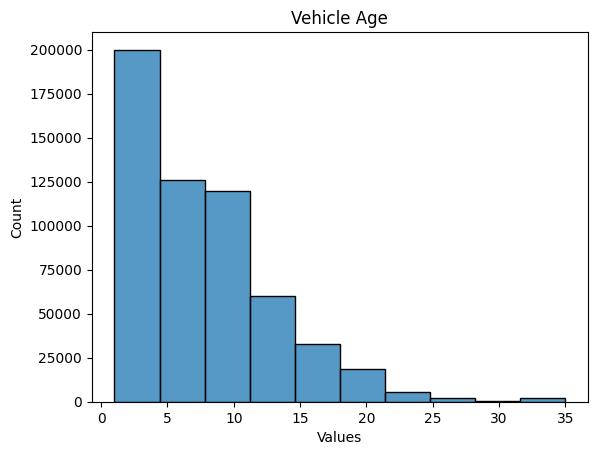

In [66]:
sns.histplot(df['VEHAGE'], bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Vehicle Age')
plt.show()

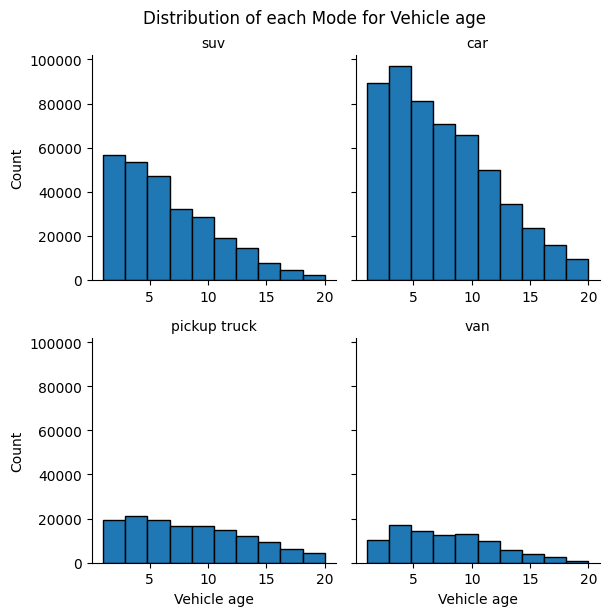

In [389]:
g = sns.FacetGrid(df, col='TRPTRANS', height=3, col_wrap=2, sharex=False)
g.map(plt.hist, 'VEHAGE', bins=10, edgecolor='black')
g.set_axis_labels('Vehicle age', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of each Mode for Vehicle age', y=1.02)
plt.show()

In [32]:
df.shape

(567101, 18)

In [33]:
df.describe()

,GASPRICE,HHSIZE,HHVEHCNT,R_AGE,TRPMILES,TRVLCMIN,WRKCOUNT,GSTOTCST,BESTMILE,VEHAGE
count,567101.000000,567101.000000,567101.00000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000,567101.000000
mean,259.195452,2.761582,2.41651,53.216886,7.457550,16.750466,1.275205,1806.105830,12351.373523,7.577178
std,70.128272,1.335875,1.06801,15.025643,8.774422,13.170753,0.936375,1190.497390,7874.464606,5.400439
min,149.500000,1.000000,1.00000,18.000000,0.010000,1.000000,0.000000,0.093203,0.480000,1.000000
25%,212.000000,2.000000,2.00000,42.000000,2.000000,8.000000,1.000000,969.126987,6794.750000,3.000000
50%,235.600000,2.000000,2.00000,54.000000,4.150000,15.000000,1.000000,1569.000000,11041.020000,6.000000
75%,281.900000,4.000000,3.00000,65.000000,9.730000,20.000000,2.000000,2367.964351,16247.770000,11.000000
max,446.000000,14.000000,7.00000,92.000000,60.000000,80.000000,7.000000,7988.000000,60000.000000,35.000000


# PRE PROCESS

In [34]:
percentage_cyc = (df['TRPTRANS'].value_counts(normalize=True) * 100).reset_index()
print(percentage_cyc)

       TRPTRANS  proportion
0           suv   53.504226
1  pickup truck   28.746908
2           van   17.748867


In [35]:
value_mapping = {"van":0, "suv":1, "pickup truck":2}
df['TRPTRANS'] = df['TRPTRANS'].replace(value_mapping)

In [36]:
value_counts = df['WHYTRP90'].value_counts()
print(value_counts)

WHYTRP90
Shopping                          141058
Other Family/Personal Business    121730
Other Social/Recreational         104335
To/From Work                       99889
Visit Friends/Relatives            31633
School/Church                      23461
Medical/Dental                     18890
Work-Related Business              14367
Other                               9529
Vacation                            2209
Name: count, dtype: int64


In [37]:
mapping1 = {
    	"Sunday":1,
    	"Monday":2,	
    	"Tuesday":3,	
    	"Wednesday":4,	
    	"Thursday":5,	
    	"Friday":6,	
    	"Saturday":7
}


df['TRAVDAY'] = df['TRAVDAY'].map(mapping1)

In [38]:
mapping1 = {
    	"January":1,
    	"February":2,	
    	"March":3,	
    	"April":4,	
    	"May":5,	
    	"June":6,	
    	"July":7,	
    	"August":8,	
    	"September":9,	
    	"October":10,
        "November":11,
        "December":12
}


df['Month'] = df['Month'].map(mapping1)

In [39]:
mapping1 = { "Less then high school graduate":1,
             "High school graduate":2,
             "College or Associate's degree":3,
             "Bachelor's degree":4, 
             "Graduate or Professional Degree (Msc, Phd)":5
}


df['EDUC'] = df['EDUC'].map(mapping1)

In [40]:
mapping1 = { "To/From Work":1,
             "Work-Related Business":2,
             "Shopping":3,
             "Other Family/Personal Business":4,
             "School/Church":5,
             "Medical/Dental":6,
             "Visit Friends/Relatives":7,
             "Vacation":8,
             "Other Social/Recreational":9,
             "Other":10
}


df['WHYTRP90'] = df['WHYTRP90'].map(mapping1)

In [41]:
le=LabelEncoder()
features=["DRVR_FLG", "R_SEX", "LIF_CYC"]
for col in features:
    df[col]=le.fit_transform(df[col])

<Axes: >

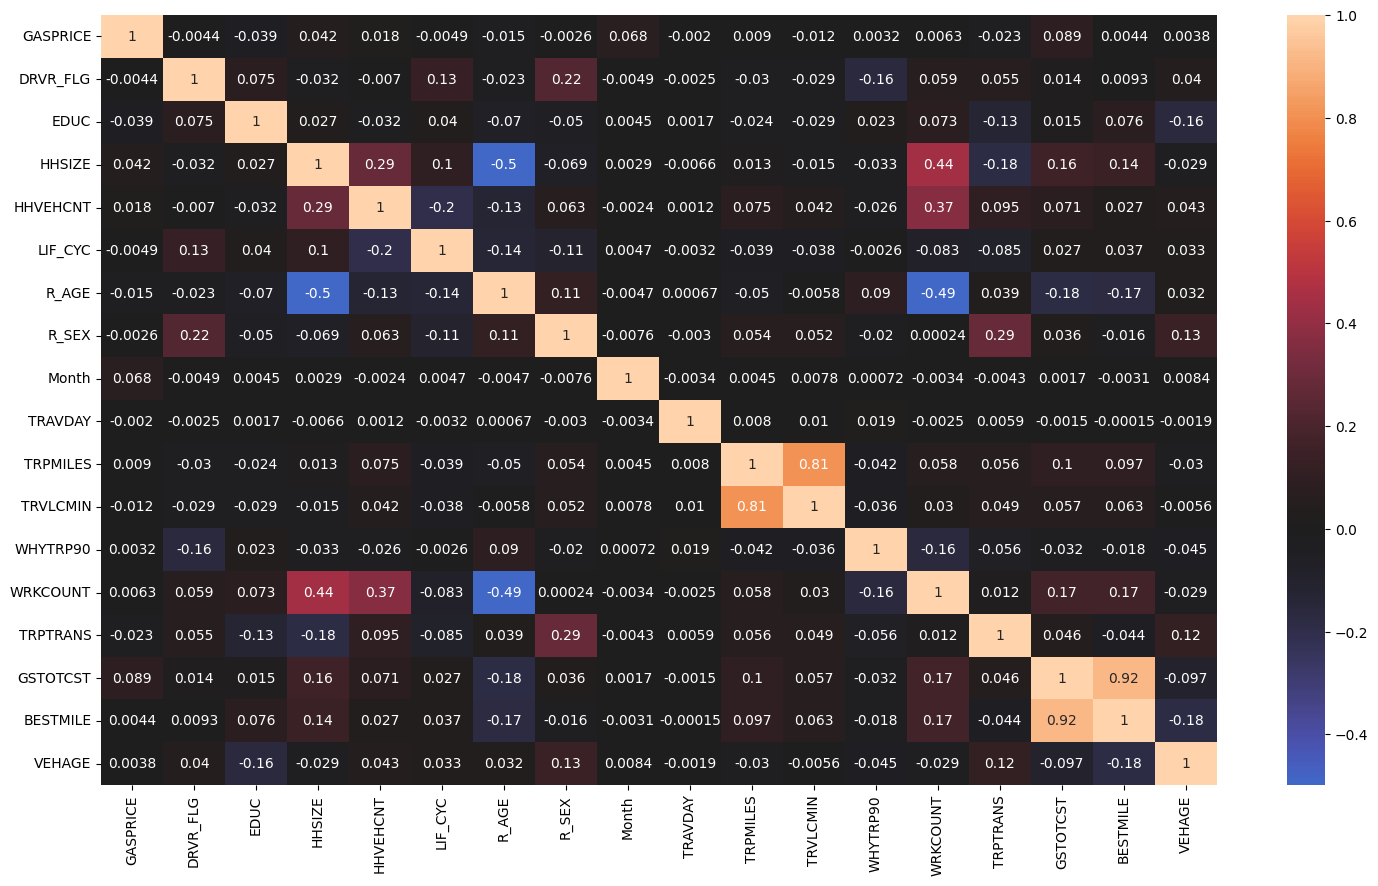

In [42]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [43]:
df_with_constant = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

    Variable        VIF
0      const  99.924994
1   GASPRICE   1.059572
2   DRVR_FLG   1.130407
3       EDUC   1.070116
4     HHSIZE   1.614891
5   HHVEHCNT   1.287722
6    LIF_CYC   1.145087
7      R_AGE   1.609593
8      R_SEX   1.199770
9      Month   1.005071
10   TRAVDAY   1.000639
11  TRPMILES   2.995241
12  TRVLCMIN   2.961852
13  WHYTRP90   1.062204
14  WRKCOUNT   1.650179
15  TRPTRANS   1.224873
16  GSTOTCST   7.226870
17  BESTMILE   7.270296
18    VEHAGE   1.112158


In [19]:
df.to_csv("PRMELACHROINOS.csv", index=False)

In [4]:
df = pd.read_csv("PRMELACHROINOS.csv")

In [44]:
df

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,TRPTRANS,GSTOTCST,BESTMILE,VEHAGE
0,200.8,0,3,3,3,1,75,1,4,4,22.00,25,6,1,1,748.000000,4548.07,1
1,200.8,0,3,3,3,1,75,1,4,4,0.22,2,7,1,1,748.000000,4548.07,1
2,200.8,0,3,3,3,1,75,1,4,4,22.00,30,7,1,1,748.000000,4548.07,1
3,200.8,0,3,3,3,1,75,1,4,4,20.00,35,5,1,1,748.000000,4548.07,1
4,200.8,1,3,3,3,1,58,0,4,4,22.00,25,7,1,1,748.000000,4548.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567110,246.9,1,4,7,5,4,59,1,1,2,4.78,12,1,1,2,896.906177,7756.19,26
567111,246.9,1,3,7,5,4,22,0,1,2,9.12,26,4,1,0,1141.752451,8886.19,21
567112,246.9,1,3,7,5,4,22,0,1,2,0.78,7,3,1,0,1141.752451,8886.19,21
567113,246.9,1,3,7,5,4,22,0,1,2,0.78,8,4,1,0,1141.752451,8886.19,21


In [45]:
dc = ["TRPTRANS", "GSTOTCST"]
X = df.drop(dc, axis=1)
y = df["TRPTRANS"]

In [46]:
X

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,BESTMILE,VEHAGE
0,200.8,0,3,3,3,1,75,1,4,4,22.00,25,6,1,4548.07,1
1,200.8,0,3,3,3,1,75,1,4,4,0.22,2,7,1,4548.07,1
2,200.8,0,3,3,3,1,75,1,4,4,22.00,30,7,1,4548.07,1
3,200.8,0,3,3,3,1,75,1,4,4,20.00,35,5,1,4548.07,1
4,200.8,1,3,3,3,1,58,0,4,4,22.00,25,7,1,4548.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567110,246.9,1,4,7,5,4,59,1,1,2,4.78,12,1,1,7756.19,26
567111,246.9,1,3,7,5,4,22,0,1,2,9.12,26,4,1,8886.19,21
567112,246.9,1,3,7,5,4,22,0,1,2,0.78,7,3,1,8886.19,21
567113,246.9,1,3,7,5,4,22,0,1,2,0.78,8,4,1,8886.19,21


In [47]:
X, y = shuffle(X, y, random_state=42)

In [48]:
X

,GASPRICE,DRVR_FLG,EDUC,HHSIZE,HHVEHCNT,LIF_CYC,R_AGE,R_SEX,Month,TRAVDAY,TRPMILES,TRVLCMIN,WHYTRP90,WRKCOUNT,BESTMILE,VEHAGE
488038,286.7,1,3,5,3,4,45,1,3,6,25.76,35,4,3,12365.73,3
514842,257.1,1,3,3,2,0,58,0,2,7,0.18,10,1,2,10172.63,3
242748,195.6,1,5,1,1,6,76,0,4,3,1.00,10,3,0,8535.66,7
325086,211.8,1,4,4,3,3,42,0,8,2,8.07,30,4,4,14708.93,9
236188,368.5,1,4,5,5,2,37,0,8,3,41.00,43,4,3,3386.73,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110271,328.4,1,4,5,6,4,50,0,4,4,1.00,2,2,3,13508.13,3
259183,363.4,1,5,3,3,3,54,1,8,7,6.00,20,5,2,5030.81,4
365844,236.0,1,5,1,1,5,55,1,10,6,2.97,15,1,1,8255.67,10
131935,322.3,1,5,2,2,0,45,0,10,6,5.00,22,3,2,3624.83,9


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
undersampler_class_1 = RandomUnderSampler(sampling_strategy={1: 130293}, random_state=42)

X_train, y_train = undersampler_class_1.fit_resample(X_train, y_train)


In [25]:
class_counts = y_train.value_counts()
print(class_counts)

1    130293
2    130292
0     80515
Name: TRPTRANS, dtype: int64


In [26]:
X_test.shape, X_train.shape

((113421, 16), (341100, 16))

In [27]:
total_samples = len(y_train)
class_percentages = (y_train.value_counts() / total_samples) * 100
print("Class percentages after undersampling:")
print(class_percentages)

Class percentages after undersampling:
1    38.197889
2    38.197596
0    23.604515
Name: TRPTRANS, dtype: float64


# NBC 

In [28]:
class_labels = ["van", "suv", "pickup truck"]

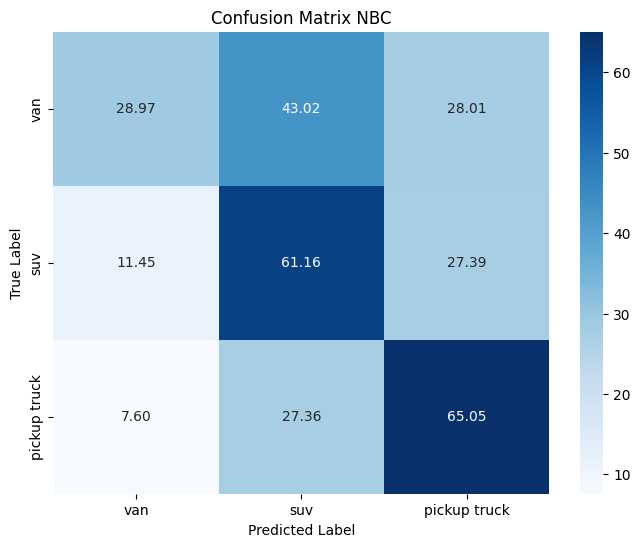

In [29]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nbc = nb_classifier.predict(X_test)
conf_matrix_nbc = confusion_matrix(y_test, y_pred_nbc)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_nbc) / conf_matrix_nbc.sum(axis=1)
conf_matrix_percentages_nbc = (conf_matrix_nbc.T / conf_matrix_nbc.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_nbc, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix NBC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
NBC_report = classification_report(y_test, y_pred_nbc)
print('NBC:', NBC_report, sep='\n')

NBC:
              precision    recall  f1-score   support

           0       0.38      0.29      0.33     20139
           1       0.68      0.61      0.64     60550
           2       0.49      0.65      0.56     32732

    accuracy                           0.57    113421
   macro avg       0.52      0.52      0.51    113421
weighted avg       0.57      0.57      0.56    113421



In [36]:
class_probabilities_nbc = nb_classifier.predict_proba(X_test)
y_pred_prob_nbc = np.argmax(class_probabilities_nbc, axis=1)

In [37]:
y_test_bin_nbc = label_binarize(y_test, classes=nb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(nb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_nbc[:, i], class_probabilities_nbc[:, i])
    average_precision[i] = average_precision_score(y_test_bin_nbc[:, i], class_probabilities_nbc[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_nbc.ravel(), class_probabilities_nbc.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_nbc, class_probabilities_nbc, average="micro")

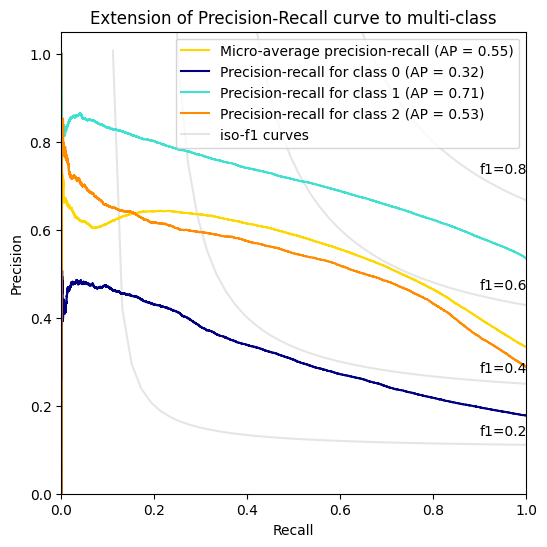

In [38]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# LOGISTIC REGRESSION

In [133]:
param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'penalty': ['l2', 'l1'],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}

In [134]:
log_model = LogisticRegression(random_state=42, multi_class = 'multinomial')
grid_search_log = GridSearchCV(log_model, param_grid, cv=10, scoring='accuracy')
grid_search_log.fit(X_train_resampled, y_train)


360 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\melac\uoa_py_course\course_venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\melac\uoa_py_course\course_venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\melac\uoa_py_course\course_venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 90, in _check_multi_class
    raise ValueError("Solver %s does not support a multino

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300], 'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [135]:
best_param = grid_search_log.best_params_
print(best_param)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [136]:
best_log = grid_search_log.best_estimator_

In [137]:
y_pred_log = best_log.predict(X_test_resampled)
Log_report = classification_report(y_test, y_pred_log)
print('log:', Log_report, sep='\n')

log:
              precision    recall  f1-score   support

           0       0.42      0.26      0.32     20186
           1       0.68      0.58      0.63     60505
           2       0.47      0.71      0.57     32730

    accuracy                           0.56    113421
   macro avg       0.52      0.52      0.50    113421
weighted avg       0.57      0.56      0.55    113421



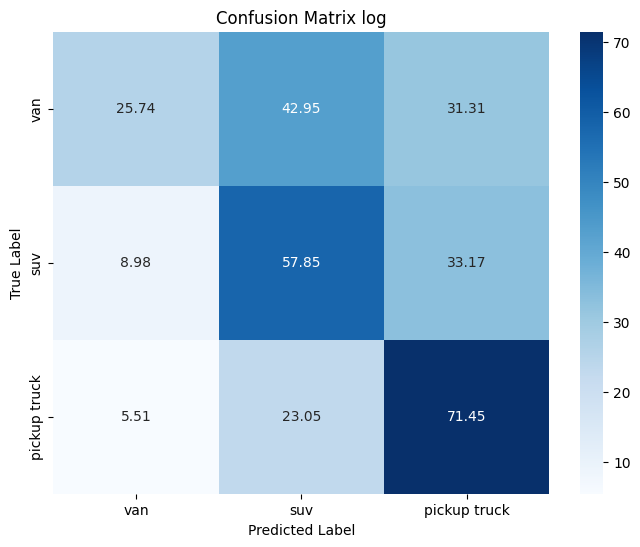

In [139]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix log')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [141]:
class_probabilities_log = best_log.predict_proba(X_test_resampled)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)

In [142]:
y_test_bin_log = label_binarize(y_test, classes=best_log.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_log.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")

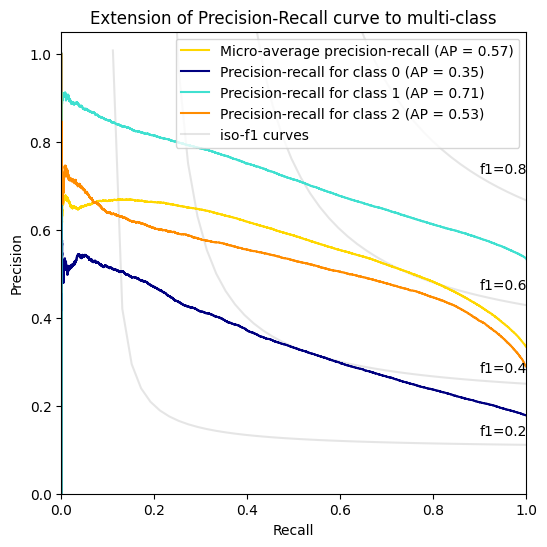

In [143]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Decision Tree

In [42]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
y_pred = clf.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print('tree test:', tree_report_test, sep='\n')

tree test:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     20139
           1       0.92      0.82      0.87     60550
           2       0.78      0.88      0.83     32732

    accuracy                           0.84    113421
   macro avg       0.82      0.86      0.84    113421
weighted avg       0.85      0.84      0.85    113421



In [44]:
tree_depth = clf.tree_.max_depth
print("Decision Tree Depth:", tree_depth)

Decision Tree Depth: 43


In [46]:
clf = DecisionTreeClassifier(random_state = 1)
param_grid = {
             'max_depth': list(range(3, 44))
}
    
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29, 30, 31, 32, ...]},
             scoring='f1_macro')

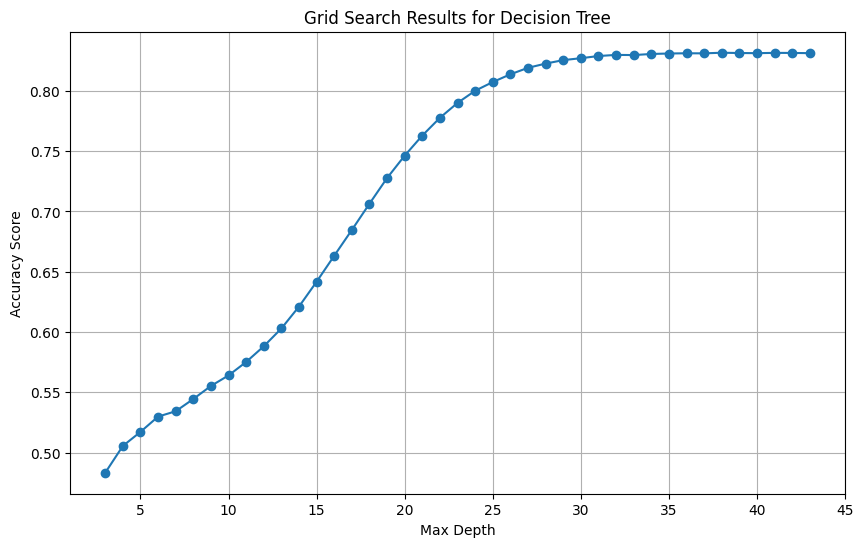

In [48]:
results = grid_search.cv_results_
max_depth_values = results['param_max_depth'].data
mean_f1_macro_scores = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_f1_macro_scores, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

In [49]:
best_tree = grid_search.best_params_
print(best_tree)

{'max_depth': 38}


In [89]:
clf = DecisionTreeClassifier(random_state=1, max_depth = 30)
tree = clf.fit(X_train, y_train)

In [90]:
y_pred_tree = tree.predict(X_test)
rep = classification_report(y_test, y_pred_tree)
print(rep)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     20139
           1       0.92      0.81      0.86     60550
           2       0.77      0.88      0.82     32732

    accuracy                           0.84    113421
   macro avg       0.82      0.85      0.83    113421
weighted avg       0.85      0.84      0.84    113421



In [91]:
column_names = X.columns
print(column_names)

Index(['GASPRICE', 'DRVR_FLG', 'EDUC', 'HHSIZE', 'HHVEHCNT', 'LIF_CYC',
       'R_AGE', 'R_SEX', 'Month', 'TRAVDAY', 'TRPMILES', 'TRVLCMIN',
       'WHYTRP90', 'WRKCOUNT', 'BESTMILE', 'VEHAGE'],
      dtype='object')


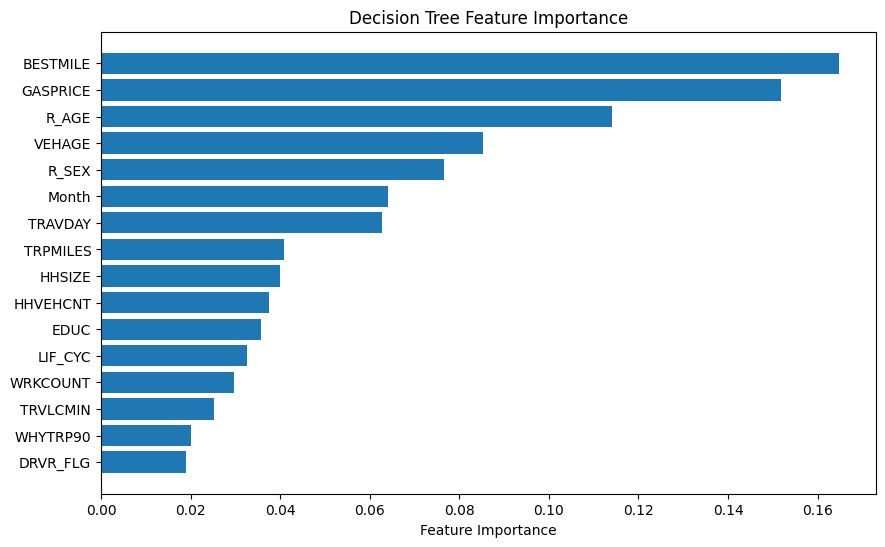

In [92]:
feature_names = ['GASPRICE','DRVR_FLG', 'EDUC', 'HHSIZE', 'HHVEHCNT', 'LIF_CYC', 'R_AGE', 'R_SEX', 'Month', 'TRAVDAY', 'TRPMILES', 'TRVLCMIN','WHYTRP90', 'WRKCOUNT','BESTMILE', 'VEHAGE']
feature_importances = tree.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [93]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)

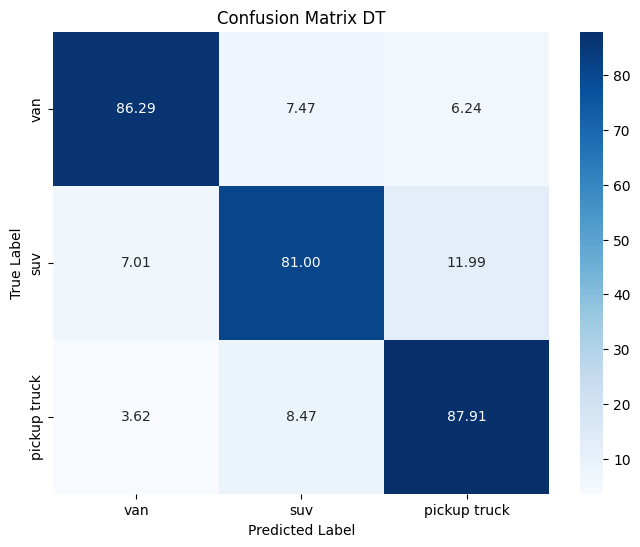

In [94]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_tree) / conf_matrix_tree.sum(axis=1)
conf_matrix_percentages_tree = (conf_matrix_tree.T / conf_matrix_tree.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_tree, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [95]:
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")

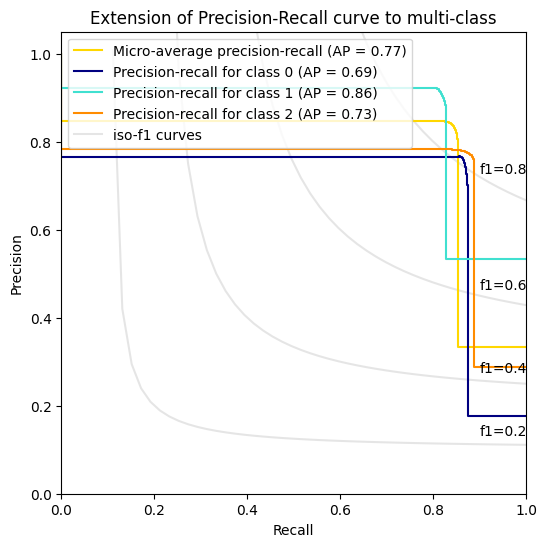

In [96]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)
    

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# Random Forest

In [55]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     20139
           1       0.95      0.86      0.91     60550
           2       0.80      0.95      0.87     32732

    accuracy                           0.89    113421
   macro avg       0.88      0.90      0.89    113421
weighted avg       0.90      0.89      0.89    113421



In [57]:
rf_params = random_forest.get_params()
print("Random Forest Parameters:")
for param, value in rf_params.items():
    print(f"{param}: {value}")

Random Forest Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


# Number of features testing

In [97]:
X_test.shape

(113421, 16)

In [98]:
param_grid = {
    'max_features': range(1, 17)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 11}


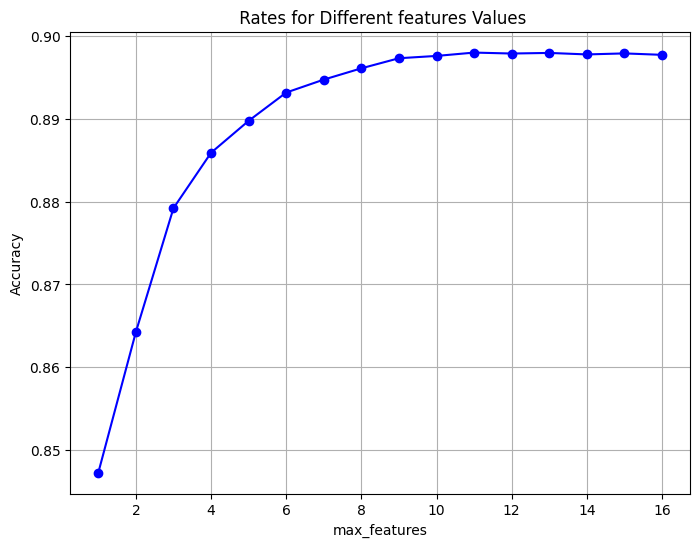

In [99]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Rates for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [40]:
rf_model = RandomForestClassifier(random_state=42, n_estimators = 500, max_features = 11)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=11, n_estimators=500, random_state=42)

In [41]:
y_pred_rf = rf_model.predict(X_test)
rf = classification_report(y_test, y_pred_rf)
print(rf)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     20139
           1       0.96      0.88      0.92     60550
           2       0.82      0.96      0.88     32732

    accuracy                           0.90    113421
   macro avg       0.90      0.91      0.90    113421
weighted avg       0.91      0.90      0.91    113421



Feature Importance:
GASPRICE: 0.1409
DRVR_FLG: 0.0181
EDUC: 0.0360
HHSIZE: 0.0408
HHVEHCNT: 0.0367
LIF_CYC: 0.0313
R_AGE: 0.1092
R_SEX: 0.0738
Month: 0.0641
TRAVDAY: 0.0595
TRPMILES: 0.0595
TRVLCMIN: 0.0391
WHYTRP90: 0.0284
WRKCOUNT: 0.0289
BESTMILE: 0.1497
VEHAGE: 0.0840


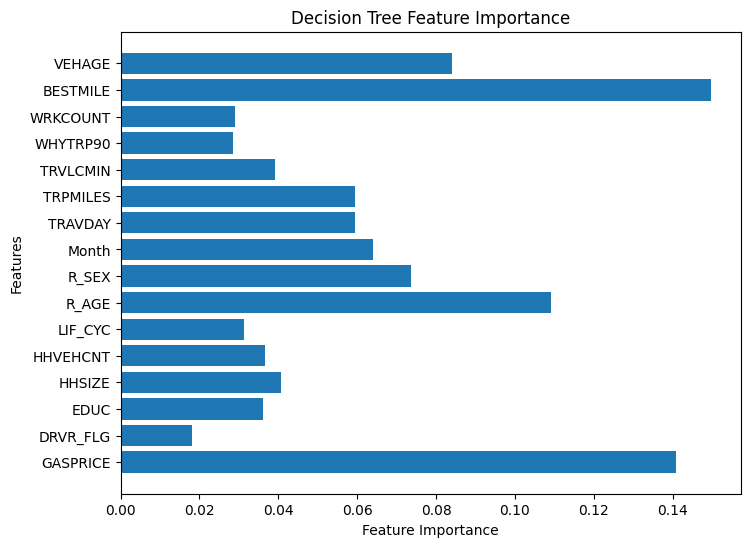

In [42]:
feature_importance = rf_model.feature_importances_
Features = ['GASPRICE','DRVR_FLG', 'EDUC', 'HHSIZE', 'HHVEHCNT', 'LIF_CYC', 'R_AGE', 'R_SEX', 'Month', 'TRAVDAY', 'TRPMILES', 'TRVLCMIN','WHYTRP90', 'WRKCOUNT','BESTMILE', 'VEHAGE']
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(8, 6))
plt.barh(Features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

In [43]:
class_labels = ["van", "suv", "pickup truck"]

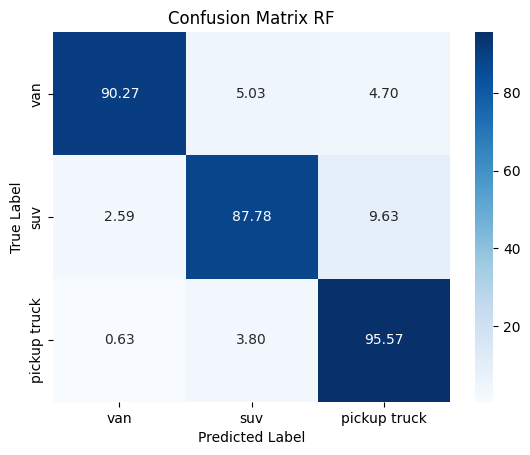

In [44]:
cm = confusion_matrix(y_test, y_pred_rf)
class_accuracies = np.diag(cm) / cm.sum(axis=1)
conf_matrix_percentages_rf = (cm.T / cm.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
class_probabilities_rf = rf_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)

In [46]:
y_test_bin_rf = label_binarize(y_test, classes=rf_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(rf_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")

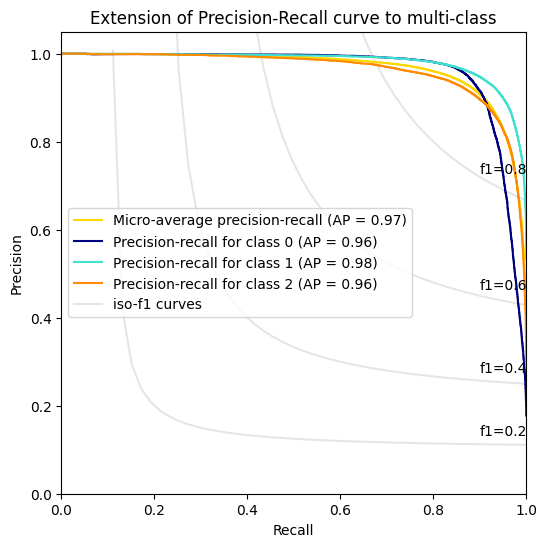

In [47]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(6, 6))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()